<a href="https://colab.research.google.com/github/Arju-cmd/Feature-Selection/blob/main/Feature_Selection_using_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [20]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"]

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [27]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


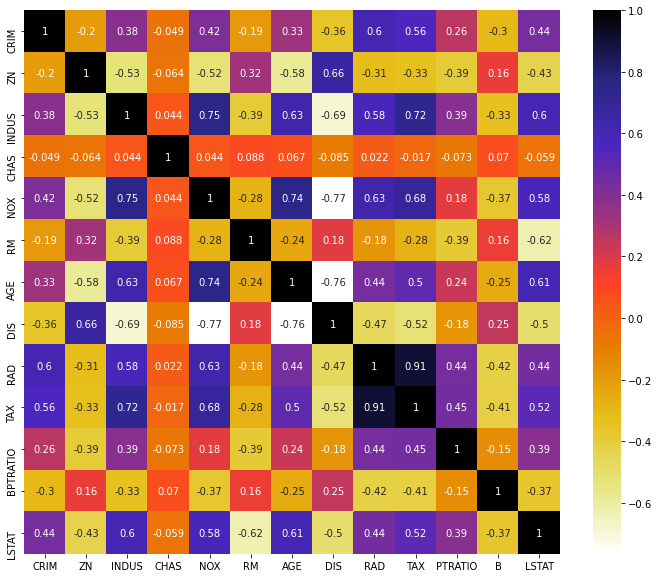

In [28]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [35]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    print(corr_matrix)
    print(corr_matrix.columns)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

             CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
CRIM     1.000000 -0.196172  0.382073  ...  0.264780 -0.299525  0.439369
ZN      -0.196172  1.000000 -0.529392  ... -0.392838  0.164641 -0.429178
INDUS    0.382073 -0.529392  1.000000  ...  0.388353 -0.331638  0.603374
CHAS    -0.049364 -0.063863  0.044224  ... -0.072683  0.069682 -0.059060
NOX      0.416560 -0.523572  0.750218  ...  0.179046 -0.369445  0.577154
RM      -0.188280  0.319260 -0.392969  ... -0.385526  0.157459 -0.623920
AGE      0.329927 -0.583885  0.629257  ...  0.239729 -0.250416  0.606530
DIS     -0.355840  0.658331 -0.686848  ... -0.176620  0.248376 -0.501780
RAD      0.603880 -0.314833  0.578459  ...  0.437687 -0.415325  0.442783
TAX      0.560570 -0.327834  0.719038  ...  0.447518 -0.412145  0.515905
PTRATIO  0.264780 -0.392838  0.388353  ...  1.000000 -0.145638  0.387752
B       -0.299525  0.164641 -0.331638  ... -0.145638  1.000000 -0.365338
LSTAT    0.439369 -0.429178  0.603374  ...  0.38775

4

In [14]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [15]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54
